### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [5]:
filepath = "laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

In [6]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [8]:
# Write your code below and press Shift+Enter to execute 
lm = LinearRegression()
x = df[['CPU_frequency']]
y = df[['Price']]
lm.fit(x,y)
Yhat = lm.predict(x)
Yhat[0:5]

array([[1073.07834392],
       [1277.93263722],
       [1636.42765051],
       [1073.07834392],
       [1175.50549057]])

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


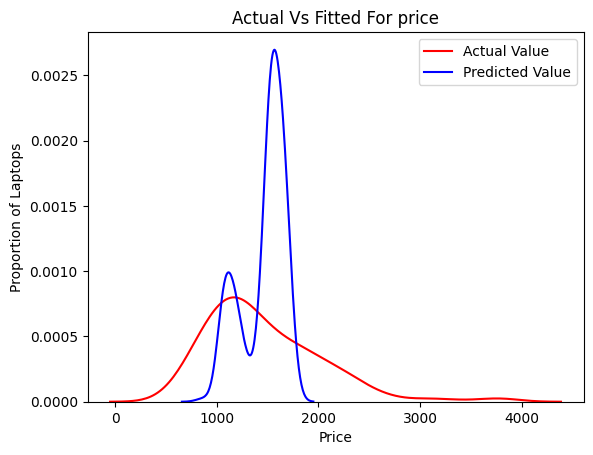

In [12]:
# Write your code below and press Shift+Enter to execute 
plt.Figure(figsize=(12,15))
ax1 = sns.distplot(df['Price'],hist=False,color='r',label="Actual Value")
sns.distplot(Yhat,hist=False,color='b',label='Fitted Value',ax=ax1)
plt.title("Actual Vs Fitted For price")
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Predicted Value'])
plt.show()


Evaluate the Mean Squared Error and R^2 score values for the model. 


In [13]:
# Write your code below and press Shift+Enter to execute 
print("The R^2 value is : ",lm.score(x,y))
print("The Mean Squared Error Value is : ",mean_squared_error(y,Yhat))


The R^2 value is :  0.1344436321024326
The Mean Squared Error Value is :  284583.4405868629


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [15]:
# Write your code below and press Shift+Enter to execute 
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm2 = LinearRegression()
lm2.fit(Z,y)
Yhat2 = lm2.predict(Z)


Plot the Distribution graph of the predicted values as well as the Actual values


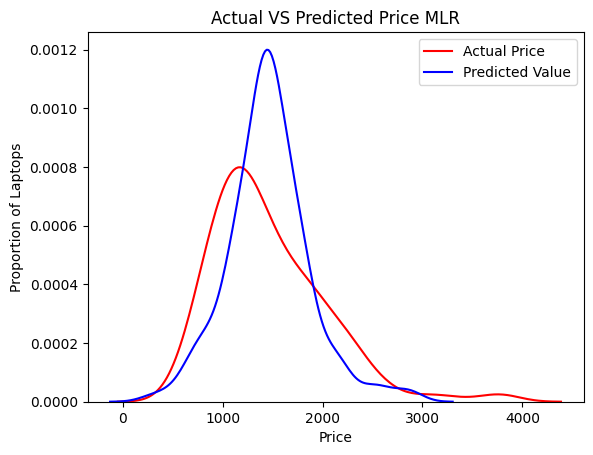

In [16]:
# Write your code below and press Shift+Enter to execute
plt.Figure(figsize=(12,15))
ax1 = sns.distplot(y,hist=False,label='Actual Price',color='r')
sns.distplot(Yhat2,hist=False,color='b',label='Predicted Value')

plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.title("Actual VS Predicted Price MLR")
plt.legend()
plt.show()


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [17]:
# Write your code below and press Shift+Enter to execute
print("The R^2 value of MLR: ",lm2.score(Z,y))
print('The mean squared error of MLR: ',mean_squared_error(y,Yhat2))

The R^2 value of MLR:  0.5082509055187376
The mean squared error of MLR:  161680.57263893104


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [26]:
#  Write your code below and press Shift+Enter to execute
x1 = df['CPU_frequency']
y1 = df['Price']
f1 =np.polyfit(x1,y1,1)
p1 = np.poly1d(f1)

f3 =np.polyfit(x1,y1,3)
p3 = np.poly1d(f3)

f5 =np.polyfit(x1,y1,5)
p5 = np.poly1d(f5)


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


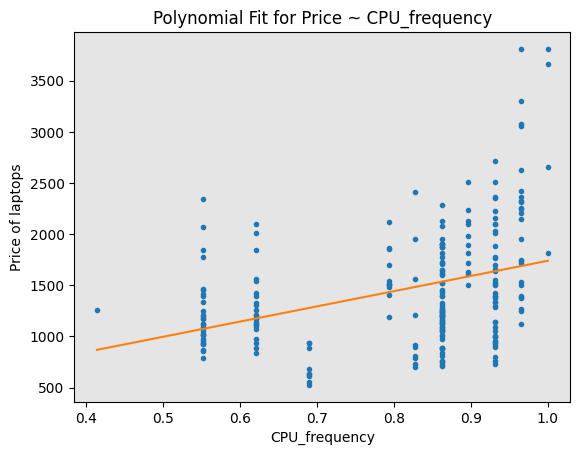

In [28]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1
PlotPolly(p1,x1,y1,'CPU_frequency')


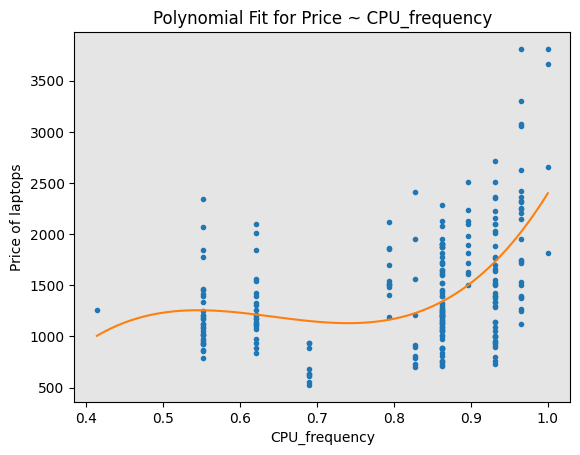

In [29]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p3,x1,y1,'CPU_frequency')



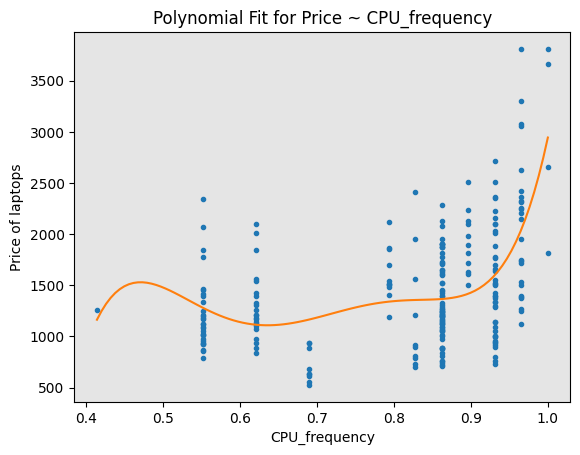

In [30]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 5
PlotPolly(p5,x1,y1,'CPU_frequency')


Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [31]:
#  Write your code below and press Shift+Enter to execute
r_squared_1 = r2_score(y1, p1(x1))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(y1,p1(x1)))
r_squared_3 = r2_score(y1, p3(x1))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(y1,p3(x1)))
r_squared_5 = r2_score(y1, p5(x1))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(y,p5(x1)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765
The R-square value for 5th degree polynomial is:  0.3030822706443915
The MSE value for 5th degree polynomial is:  229137.29548053455


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [32]:
#  Write your code below and press Shift+Enter to execute
input  = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)


Evaluate the MSE and R^2 values for the this predicted output.


In [33]:
#  Write your code below and press Shift+Enter to execute
print("The MSE of Pipeline : ",mean_squared_error(y,ypipe))
print("The R^2 value is : ", r2_score(y,ypipe))

The MSE of Pipeline :  120595.86128028373
The R^2 value is :  0.6332094535859658


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|--!>


## NOW WE CAN SEE THE IMPROVEMENT IN THE VALUES OF R^2 AND MEAN_SQUARED_ERROR FORM SLR TO MLR AND EXTENDED TO POLYNOMIAL